# Comparative Analysis of Hydrocarbon Types (Oil vs. Gas) in Relation to Key Production Variables in Colombia

### Description: 

👉This project aims to explore and analyze the differences in behavior between two types of hydrocarbons—Oil and Gas—across various production and financial variables. The dataset includes variables such as location, year, month, contract details, production volume, royalties, and pricing. By conducting a comprehensive statistical analysis, we seek to identify patterns, correlations, and significant differences between Oil and Gas in terms of their economic and production metrics.

### Objectives:  

1. **Compare Production Metrics:** Analyze and compare the production volume (ProdTaxableBlsKpc) and royalty volumes (VolumeRoyaltiesBlsKpc) between Oil and Gas.

2. **Evaluate Economic Impact:** Investigate how the Price of Hydrocarbon (PriceHydrocarbonUSD) and Royalties (RoyaltiesCOP) differ between Oil and Gas, and assess their correlation.

3. **Identify Trends Over Time:¨** Examine how the production and economic variables for Oil and Gas have evolved over the years and across different months.

4. **Correlation Analysis:** Determine the relationships between TypeHydrocarbon and other variables, such as PercRoyalties, TrmAverage, and Contract type, to identify any significant correlations.

5. **Outlier Detection:** Identify and analyze any outliers in production and financial data for Oil and Gas to understand any anomalies or exceptional cases.

### Exploratory Data Analysis (EDA):

Below is a detailed EDA plan focusing on comparing 'TypeHydrocarbon' (Oil vs. Gas) with the other variables in the dataset.

### Importing the necessary libraries I will use for this project

In [22]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

### Read data and obtain information. 

In [23]:
data = pd.read_excel('C:/Users/juang/OneDrive/Escritorio/datasets/Hydrocarbon production in Colombia.xlsx', sheet_name='Production')
data

,Department,Municipality,Year,Month,Contract,Camp,TypeHydrocarbon,PriceHydrocarbonUSD,PercRoyalties,ProdTaxableBlsKpc,VolumeRoyaltiesBlsKpc,RoyaltiesCOP,TrmAverage
0,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-A,TECA COCORNÁ,Oil,63.1300,0.20,37220.00,7444.0000,9.154661e+08,1948.05
1,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-A,TECA COCORNÁ,Oil,63.1300,0.12,37220.00,4466.4000,5.492796e+08,1948.05
2,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-C,COCORNA,Oil,63.0800,0.20,8583.00,1716.6000,2.109409e+08,1948.05
3,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-C,COCORNA,Oil,63.0800,0.12,8583.00,1029.9600,1.265646e+08,1948.05
4,ANTIOQUIA,PUERTO NARE,2010,1,NARE,NARE SUR,Oil,63.1300,0.20,18090.00,3618.0000,4.449431e+08,1948.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181955,TOLIMA,SAN LUIS,2024,3,ORTEGA,PACANDE,Oil,70.9588,0.20,1998.72,399.7440,1.106062e+08,3899.34
181956,TOLIMA,VENADILLO,2024,3,ARMERO,TOTARE,Gas,6.4564,0.20,19.77,3.9540,9.954423e+04,3899.34
181957,TOLIMA,VENADILLO,2024,3,ARMERO,TOTARE,Gas,6.4564,0.12,19.77,2.3724,5.972683e+04,3899.34
181958,TOLIMA,VENADILLO,2024,3,ARMERO,TOTARE,Oil,78.3342,0.20,613.31,122.6620,3.746731e+07,3899.34


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Department             181960 non-null  object 
 1   Municipality           181960 non-null  object 
 2   Year                   181960 non-null  int64  
 3   Month                  181960 non-null  int64  
 4   Contract               181960 non-null  object 
 5   Camp                   181960 non-null  object 
 6   TypeHydrocarbon        181960 non-null  object 
 7   PriceHydrocarbonUSD    180871 non-null  float64
 8   PercRoyalties          181960 non-null  float64
 9   ProdTaxableBlsKpc      181960 non-null  float64
 10  VolumeRoyaltiesBlsKpc  181960 non-null  float64
 11  RoyaltiesCOP           181960 non-null  float64
 12  TrmAverage             181960 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 18.0+ MB


### Information about the data 

In [25]:
text_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['number']).columns
data1 = data.dropna(subset=text_columns)
data1[numeric_columns] = data1[numeric_columns].fillna(0)
print(data1.isnull().sum())
data1

Department               0
Municipality             0
Year                     0
Month                    0
Contract                 0
Camp                     0
TypeHydrocarbon          0
PriceHydrocarbonUSD      0
PercRoyalties            0
ProdTaxableBlsKpc        0
VolumeRoyaltiesBlsKpc    0
RoyaltiesCOP             0
TrmAverage               0
dtype: int64


,Department,Municipality,Year,Month,Contract,Camp,TypeHydrocarbon,PriceHydrocarbonUSD,PercRoyalties,ProdTaxableBlsKpc,VolumeRoyaltiesBlsKpc,RoyaltiesCOP,TrmAverage
0,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-A,TECA COCORNÁ,Oil,63.1300,0.20,37220.00,7444.0000,9.154661e+08,1948.05
1,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-A,TECA COCORNÁ,Oil,63.1300,0.12,37220.00,4466.4000,5.492796e+08,1948.05
2,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-C,COCORNA,Oil,63.0800,0.20,8583.00,1716.6000,2.109409e+08,1948.05
3,ANTIOQUIA,PUERTO NARE,2010,1,COCORNA-C,COCORNA,Oil,63.0800,0.12,8583.00,1029.9600,1.265646e+08,1948.05
4,ANTIOQUIA,PUERTO NARE,2010,1,NARE,NARE SUR,Oil,63.1300,0.20,18090.00,3618.0000,4.449431e+08,1948.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181955,TOLIMA,SAN LUIS,2024,3,ORTEGA,PACANDE,Oil,70.9588,0.20,1998.72,399.7440,1.106062e+08,3899.34
181956,TOLIMA,VENADILLO,2024,3,ARMERO,TOTARE,Gas,6.4564,0.20,19.77,3.9540,9.954423e+04,3899.34
181957,TOLIMA,VENADILLO,2024,3,ARMERO,TOTARE,Gas,6.4564,0.12,19.77,2.3724,5.972683e+04,3899.34
181958,TOLIMA,VENADILLO,2024,3,ARMERO,TOTARE,Oil,78.3342,0.20,613.31,122.6620,3.746731e+07,3899.34


### Analysis of variables

C:\Users\juang\AppData\Local\Temp\ipykernel_6484\3872309705.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



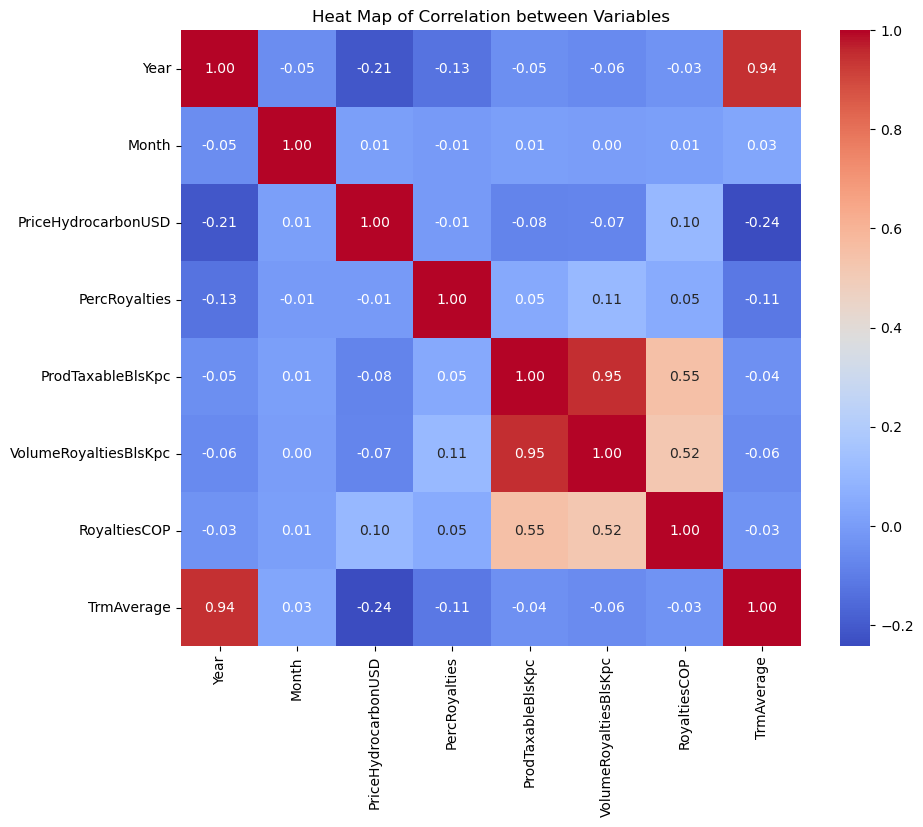

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heat Map of Correlation between Variables")
plt.show()

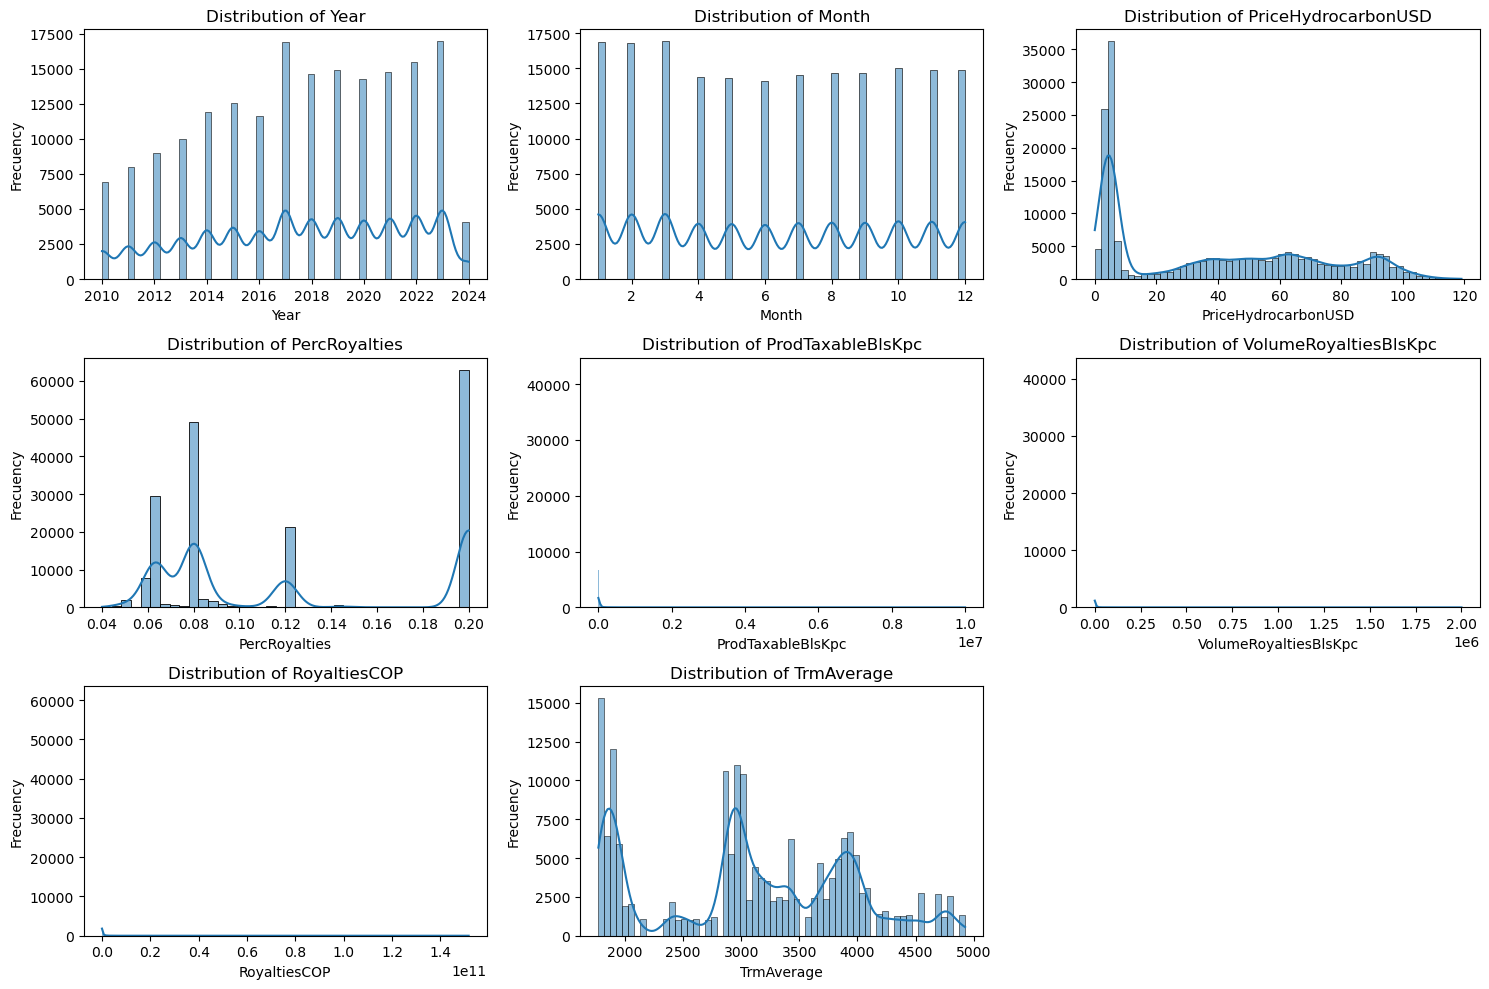

In [27]:
numeric_columns = data1.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
plt.tight_layout()
plt.show()

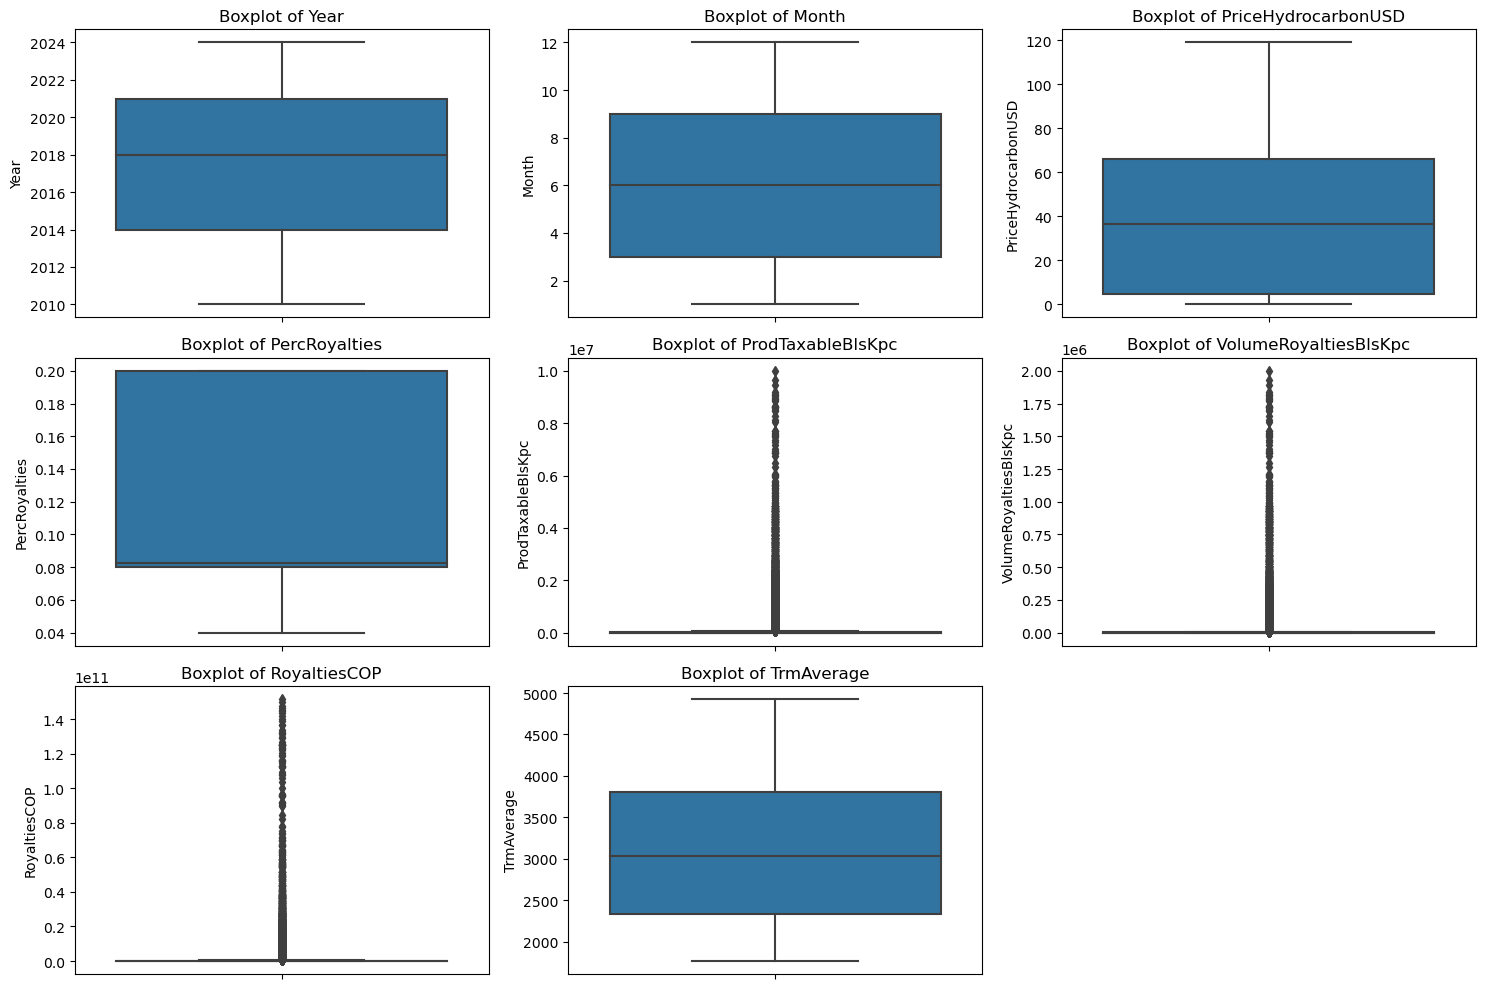

In [28]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data1[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [29]:
data.describe(include='all')

,Department,Municipality,Year,Month,Contract,Camp,TypeHydrocarbon,PriceHydrocarbonUSD,PercRoyalties,ProdTaxableBlsKpc,VolumeRoyaltiesBlsKpc,RoyaltiesCOP,TrmAverage
count,181960,181960,181960.000000,181960.000000,181960,181960,181960,180871.000000,181960.000000,1.819600e+05,1.819600e+05,1.819600e+05,181960.000000
unique,23,141,NaN,NaN,276,750,2,NaN,NaN,NaN,NaN,NaN,NaN
top,CASANARE,AGUAZUL,NaN,NaN,ECOP-SDLA-OP-DIRECTA,CUPIAGUA,Oil,NaN,NaN,NaN,NaN,NaN,NaN
freq,69330,15194,NaN,NaN,13529,12348,109105,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017.552396,6.364564,NaN,NaN,NaN,38.825205,0.122895,6.217469e+04,8.408950e+03,5.353965e+08,3084.485408
std,NaN,NaN,3.895466,3.511696,NaN,NaN,NaN,33.396287,0.058535,2.846912e+05,4.923550e+04,3.085203e+09,864.483614
min,NaN,NaN,2010.000000,1.000000,NaN,NaN,NaN,0.000000,0.040000,-1.167300e+02,-2.334600e+01,0.000000e+00,1769.670000
25%,NaN,NaN,2014.000000,3.000000,NaN,NaN,NaN,4.793923,0.080000,7.750000e+02,8.005560e+01,3.191107e+06,2342.250000
50%,NaN,NaN,2018.000000,6.000000,NaN,NaN,NaN,36.707000,0.082523,4.936125e+03,5.384354e+02,4.452354e+07,3036.580000
75%,NaN,NaN,2021.000000,9.000000,NaN,NaN,NaN,66.240700,0.200000,2.253725e+04,2.547796e+03,2.573356e+08,3807.170000


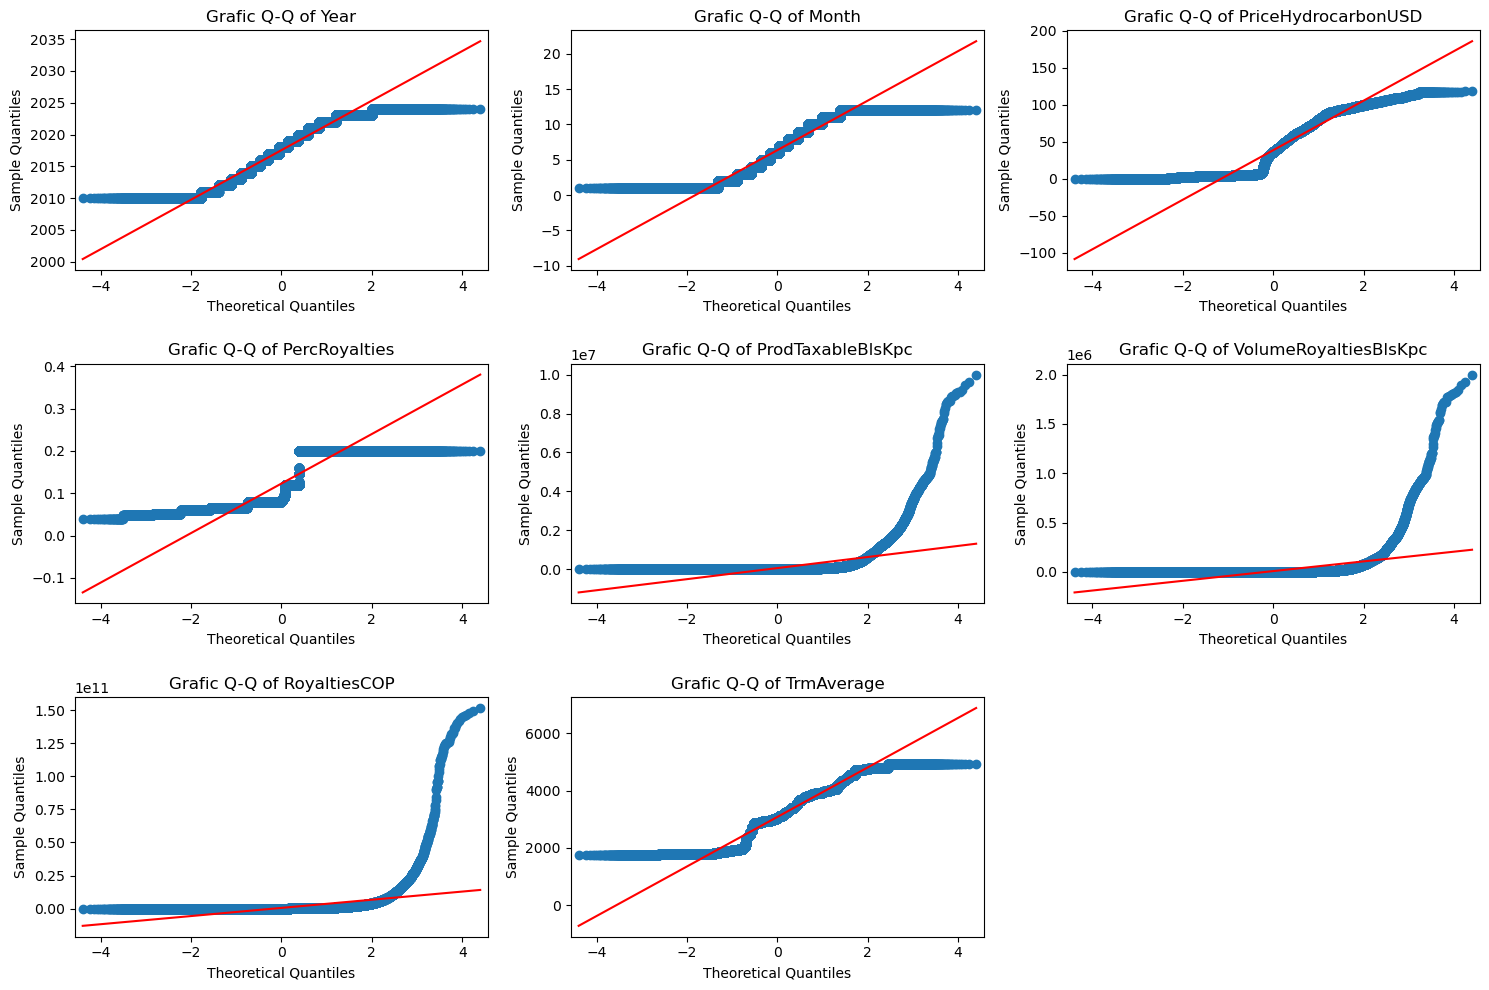

In [30]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sm.qqplot(data1[col], line='s', ax=plt.gca())
    plt.title(f'Grafic Q-Q of {col}')
plt.tight_layout()
plt.show()

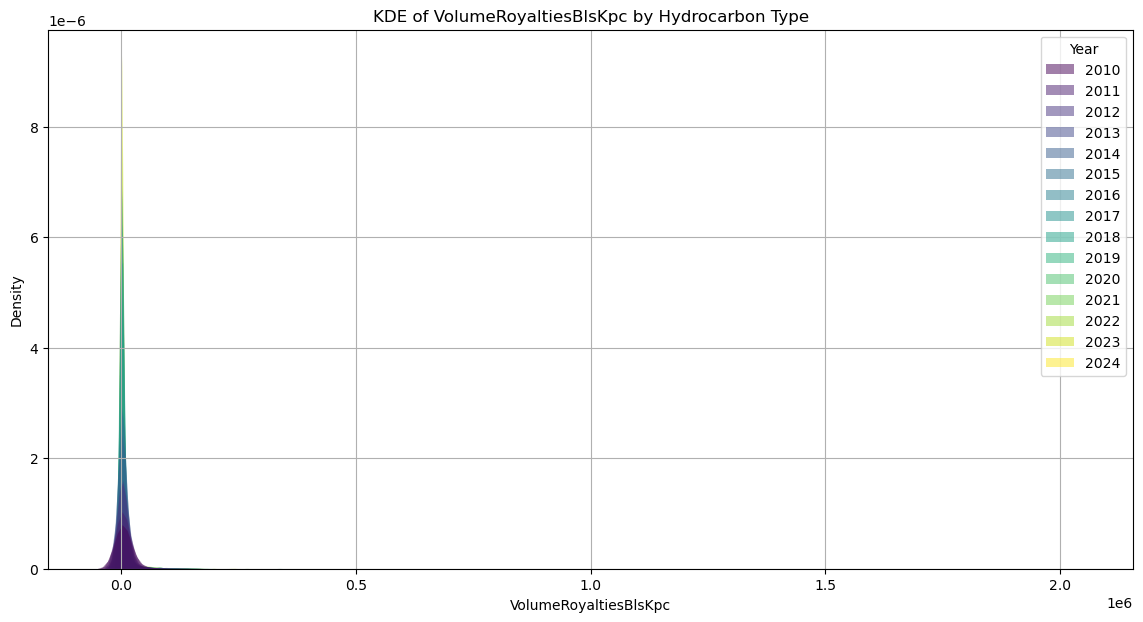

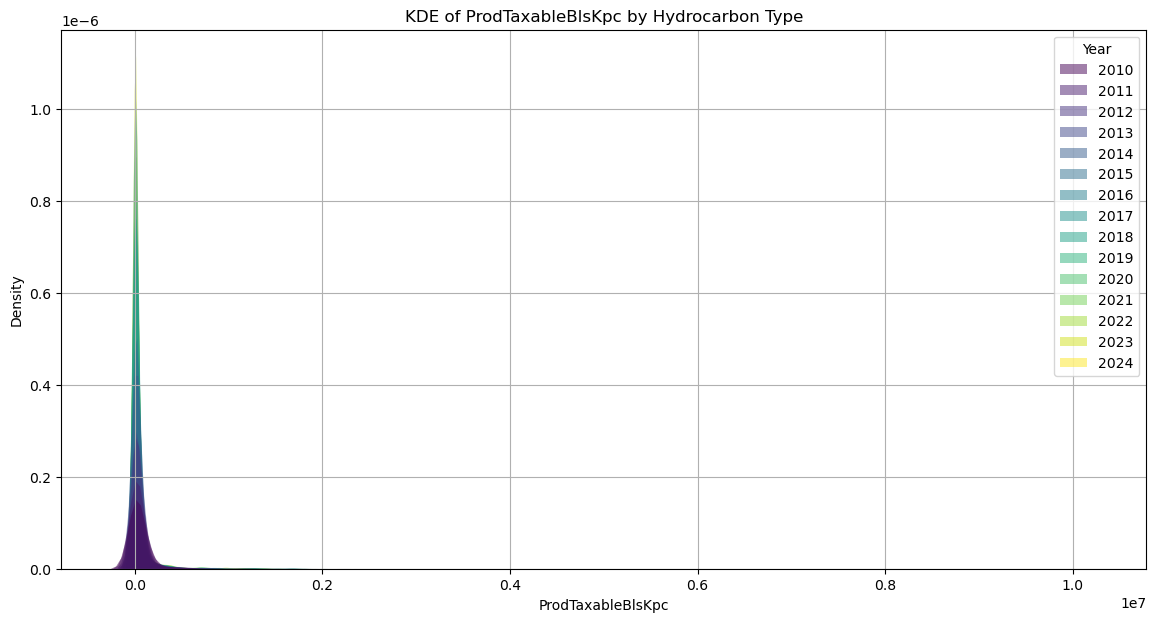

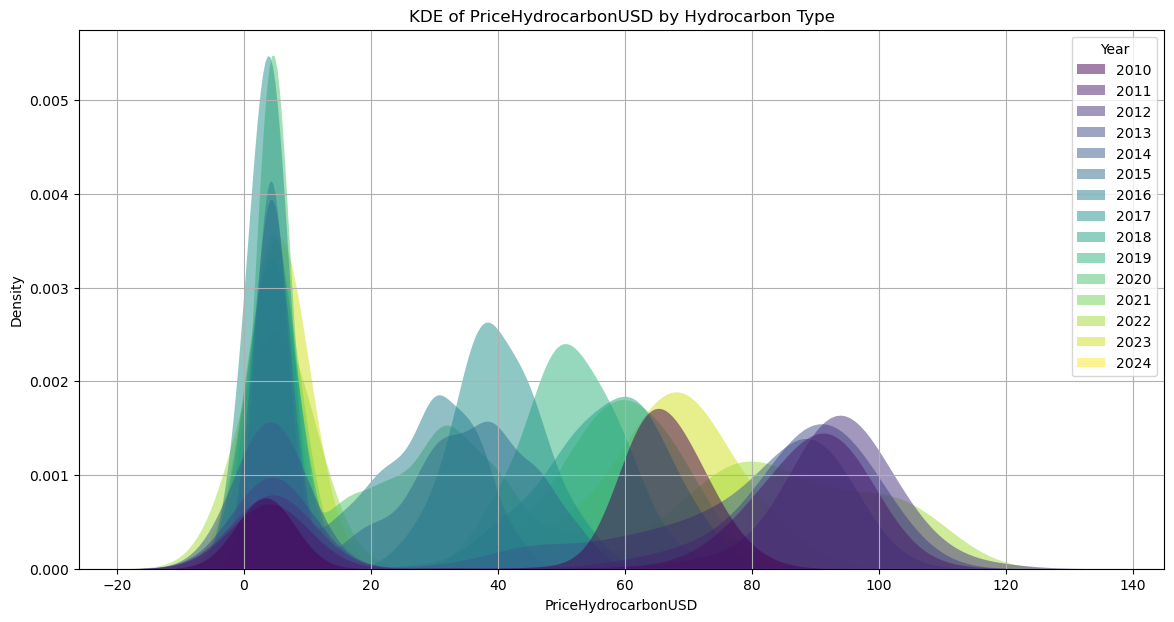

In [31]:
list_to_plot = ['VolumeRoyaltiesBlsKpc', 'ProdTaxableBlsKpc', 'PriceHydrocarbonUSD']
for i in list_to_plot:
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.kdeplot(data=data1, x=i, hue='Year', fill=True, alpha=.5, linewidth=0, palette='viridis')
    plt.title(f"KDE of {i} by Hydrocarbon Type")
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

### Comparison between Oil and Gas with multivariable analysis

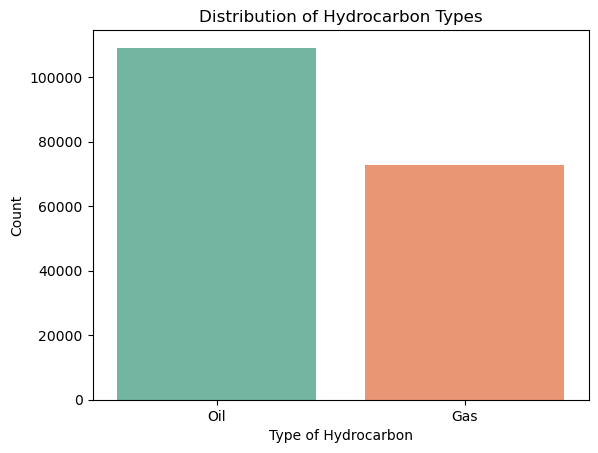

In [32]:
sns.countplot(x='TypeHydrocarbon', data=data1, palette="Set2")
plt.title('Distribution of Hydrocarbon Types')
plt.xlabel('Type of Hydrocarbon')
plt.ylabel('Count')
plt.show()

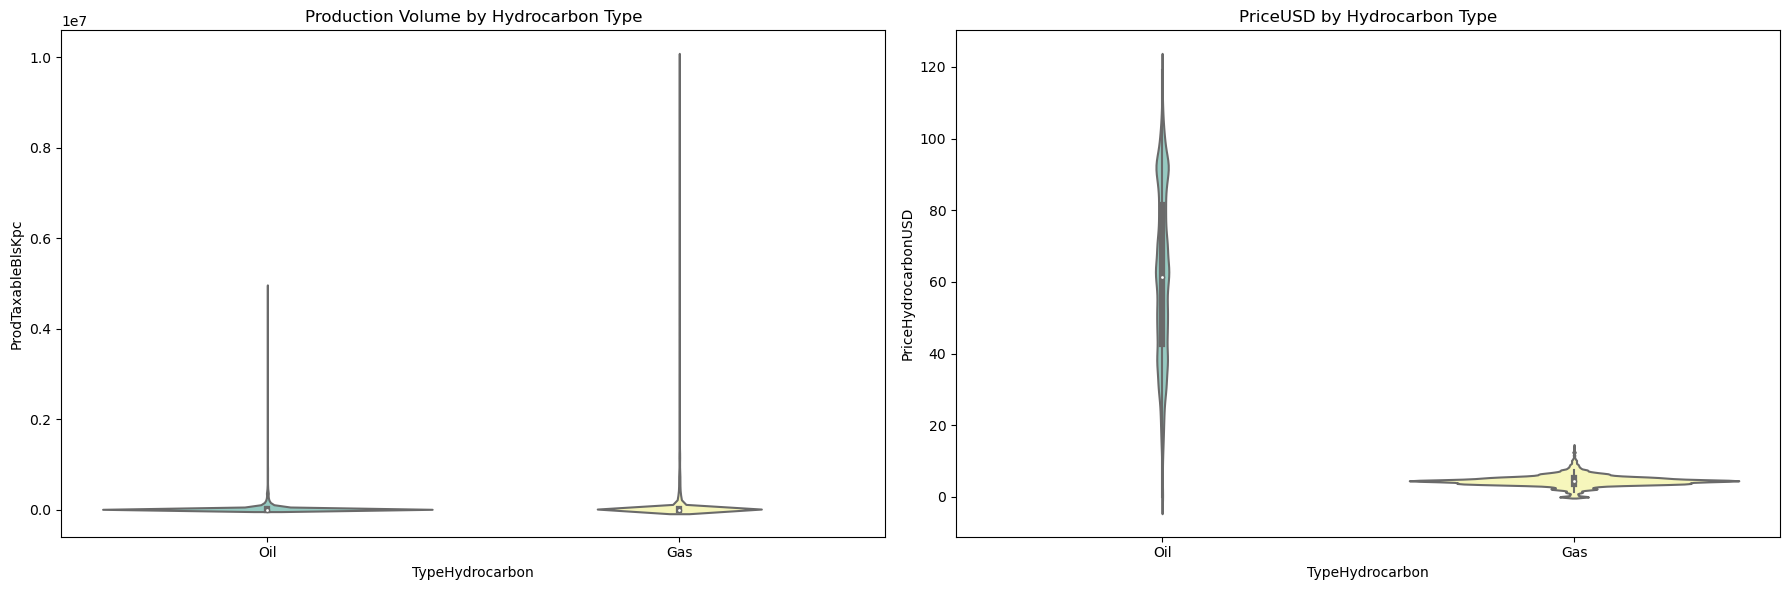

In [33]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='TypeHydrocarbon', y='ProdTaxableBlsKpc', data=data1, palette="Set3")
plt.title('Production Volume by Hydrocarbon Type')
plt.subplot(1, 2, 2)
sns.violinplot(x='TypeHydrocarbon', y='PriceHydrocarbonUSD', data=data1, palette="Set3")
plt.title('PriceUSD by Hydrocarbon Type')
plt.tight_layout()
plt.show()

C:\Users\juang\AppData\Local\Temp\ipykernel_6484\1490850444.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



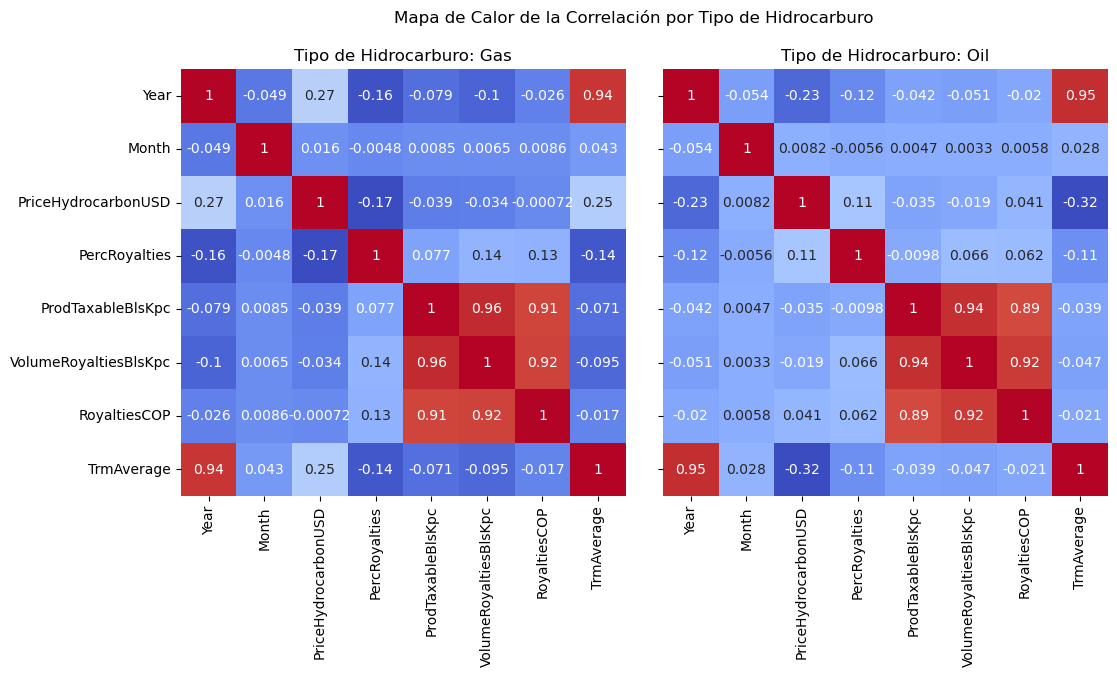

In [34]:
g = sns.FacetGrid(data1, col="TypeHydrocarbon", height=5, aspect=1)
for ax, (type_hydrocarbon, subset) in zip(g.axes.flat, data1.groupby("TypeHydrocarbon")):
    sns.heatmap(subset.corr(), annot=True, cmap="coolwarm", ax=ax, cbar=False)
    ax.set_title(f'Tipo de Hidrocarburo: {type_hydrocarbon}')
plt.suptitle('Mapa de Calor de la Correlación por Tipo de Hidrocarburo', y=1.05)
plt.show()

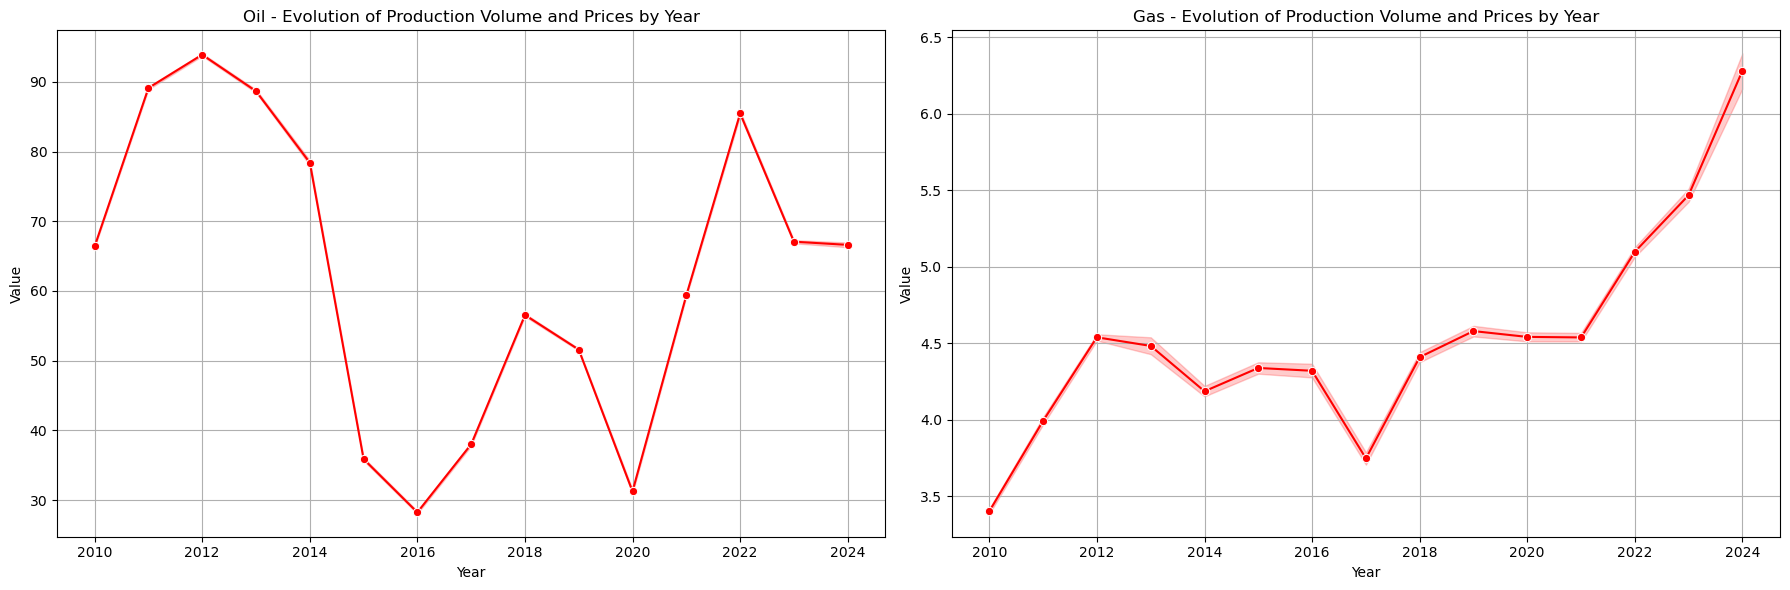

In [58]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=data1[data1['TypeHydrocarbon'] == 'Oil'], x="Year", y="PriceHydrocarbonUSD", marker="o", color='red')
plt.title("Oil - Evolution of Production Volume and Prices by Year")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.subplot(1, 2, 2)
sns.lineplot(data=data1[data1['TypeHydrocarbon'] == 'Gas'], x="Year", y="PriceHydrocarbonUSD", marker="o", color='red')
plt.title("Gas - Evolution of Production Volume and Prices by Year")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

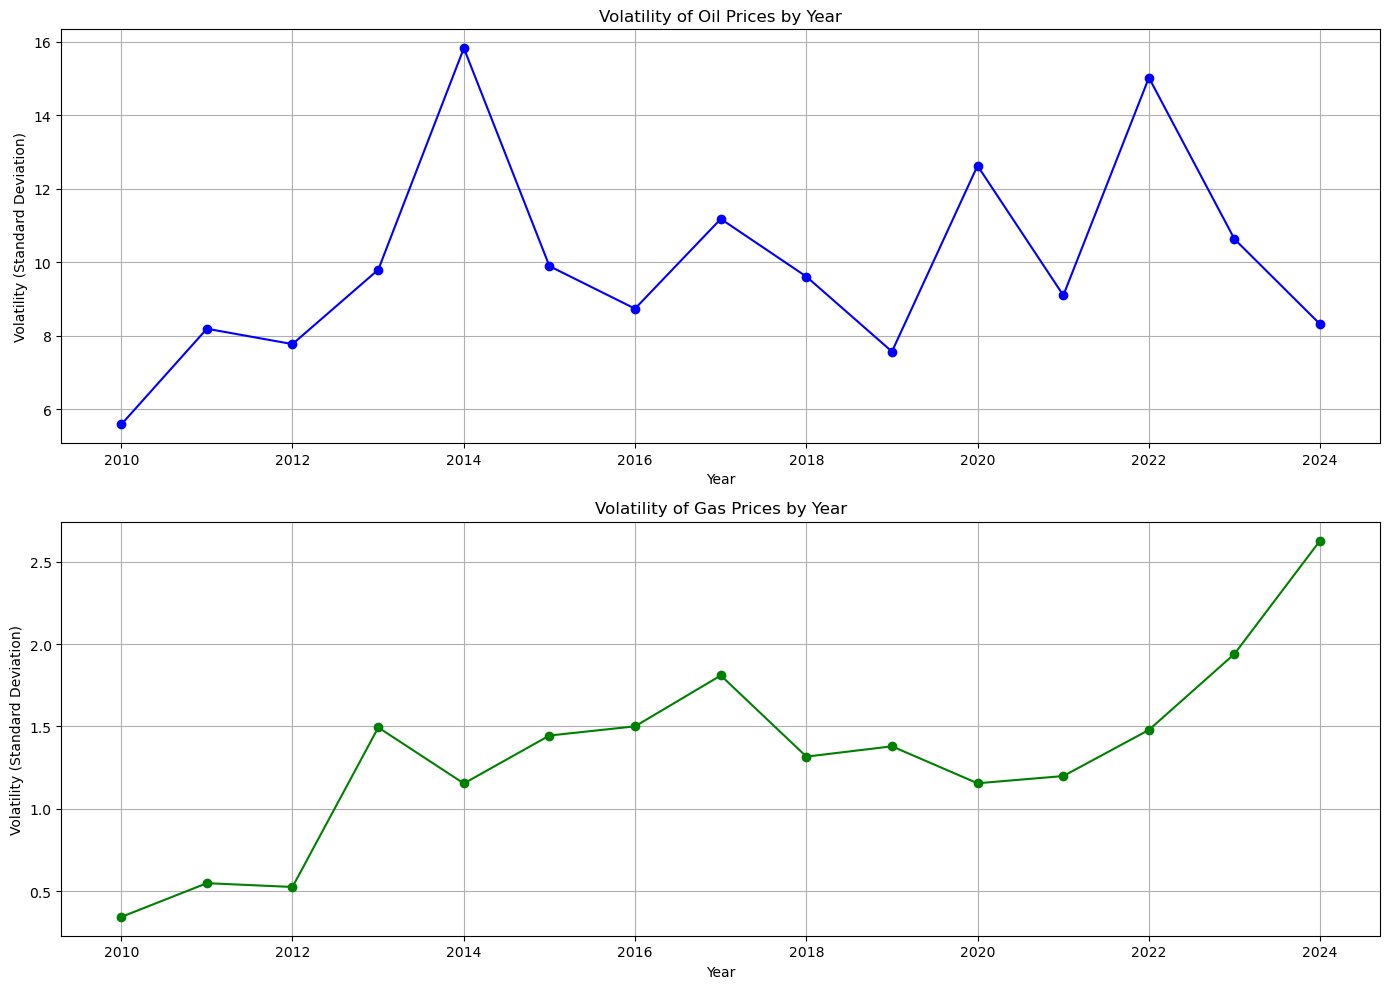

In [64]:
oil_data = data1[data1['TypeHydrocarbon'] == 'Oil']
gas_data = data1[data1['TypeHydrocarbon'] == 'Gas']
oil_volatility = oil_data.groupby('Year')['PriceHydrocarbonUSD'].std()
gas_volatility = gas_data.groupby('Year')['PriceHydrocarbonUSD'].std()
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(oil_volatility.index, oil_volatility.values, color='blue', marker='o')
plt.title('Volatility of Oil Prices by Year')
plt.xlabel('Year')
plt.ylabel('Volatility (Standard Deviation)')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(gas_volatility.index, gas_volatility.values, color='green', marker='o')
plt.title('Volatility of Gas Prices by Year')
plt.xlabel('Year')
plt.ylabel('Volatility (Standard Deviation)')
plt.grid(True)
plt.tight_layout()
plt.show()

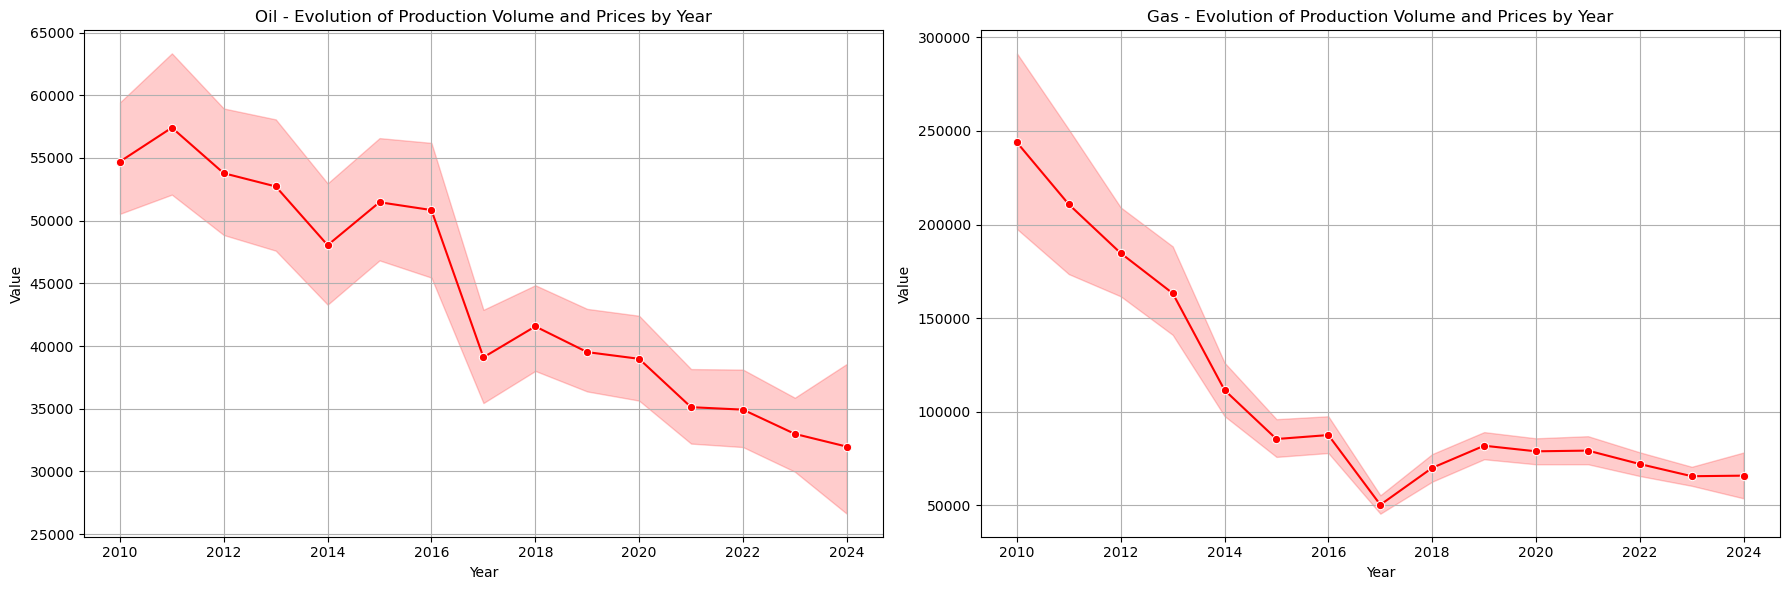

In [59]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=data1[data1['TypeHydrocarbon'] == 'Oil'], x="Year", y="ProdTaxableBlsKpc", marker="o", color='red')
plt.title("Oil - Evolution of Production Volume and Prices by Year")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.subplot(1, 2, 2)
sns.lineplot(data=data1[data1['TypeHydrocarbon'] == 'Gas'], x="Year", y="ProdTaxableBlsKpc", marker="o", color='red')
plt.title("Gas - Evolution of Production Volume and Prices by Year")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion:

1. **Production and Price Trends:** The analyses show how hydrocarbon production and prices have evolved over the years. Trends can reveal seasonal or cyclical patterns and help predict future production and price behavior. In the case of oil, the price was very high during 2012 and 2022, while gas has been growing over the years. On the other hand, the price of oil is much more volatile than the price of gas, since the price of gas is much more stable.
2. **Relationship between variables:** The high correlation between taxable production and royalties in Colombian Pesos suggests that royalty income is closely linked to production volumes. This emphasizes the importance of production in determining royalty income. The highest negative relationships are found between price with average TRM and price with royalties.
3. **Distribución y Comportamiento de Datos:** Data distribution and identification of potential outliers or biases in key variables provide insight into data quality and overall behavior. Histograms and boxplots help identify these issues.
4. **Comparison between Types of Hydrocarbons:** Violinplot and kdeplot visualizations show how production and pricing characteristics vary between Oil and Gas. These comparisons are useful for understanding the differences in markets and pricing policies for each type of hydrocarbon.